<div style="background-color: #1DA1F2; padding: 20px;"><b><h1> Descifrando el lenguaje emocional en Twitter: Un análisis predictivo basado en aprendizaje automático. </h1></b></div>

**Autor**: Neivys Luz González Gómez

La identificación de emociones es una tarea fundamental en el campo del procesamiento de lenguaje natural, que se enfoca en clasificar textos según su tono emocional. A pesar de que el objetivo es identificar una amplia variedad de emociones humanas, la mayoría de los conjuntos de datos disponibles se limitan a las polaridades positiva, negativa y, en ocasiones, neutral.

Detectar emociones a partir de textos es un reto complejo en el procesamiento del lenguaje natural, ya que se trata de un problema de clasificación multiclase y, en muchas ocasiones, no hay suficientes datos etiquetados disponibles. Sin embargo, este conjunto de datos etiquetado proporciona la oportunidad de aplicar diversas técnicas de análisis exploratorio y modelado para entender mejor la dinámica emocional en las redes sociales y mejorar la capacidad de detección en tiempo real.

El conjunto de datos de emociones se obtiene a partir de mensajes en inglés de Twitter y contiene seis emociones básicas: neutralidad, preocupación, felicidad, tristeza, amor, sorpresa, diversión, alivio, odio, vacío, entusiasmo y aburrimiento. Este conjunto de datos ofrece una variedad más amplia de emociones humanas, lo que permite el entrenamiento y la evaluación de modelos de análisis de sentimientos con mayor precisión y exhaustividad.

<div class="alert alert-info alert-info"><b><h3>Objetivo General</h3></b>
    
**Desarrollar un modelo que permita detectar emociones en los tweets y analizar patrones en el lenguaje utilizado en Twitter para ayudar en la detección temprana de trastornos emocionales como la depresión, la ansiedad, entre otros.**
</div>

---

# Notebook N° 5: Modelo ML Clasificación - Polaridad 

<div class="alert alert-block alert-warning">
<b><h1>Descripción de las Variables</h1></b> 
</div>

Se dispone de un conjunto de datos proveniente de data.world, una plataforma que proporciona acceso a conjuntos de datos públicos. Este dataset consiste en una colección de tweets etiquetados con la emoción que expresan. Contiene cuatro columnas que incluyen el identificador del tweet, el sentimiento expresado, el autor y el contenido del tweet. En total, se tienen 40,000 registros con anotaciones para 13 emociones distintas. 

<img src="Notebook.jpg">

Este notebook presenta la evaluación de varios modelos de clasificación de emociones en tweets, con el objetivo de seleccionar el mejor modelo para predecir las emociones en nuevos tweets. Para ello, se utilizó un dataset preprocesado en el que las emociones originales fueron transformadas en sentimientos. 

Se compararan diversos modelos, incluyendo SVM, SGDClassifier, MultinomialNB, BernoulliNB y XGBClassifier, evaluando su precisión y rendimiento mediante validación cruzada. Se seleccionará el mejor modelo y se utilizará para crear un pipeline predictivo capaz de clasificar las emociones en nuevos tweets con precisión.

---

In [1]:
#import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

#import NLTK
import nltk
nltk.download('punkt') #Punkt es una biblioteca que se utiliza para tokenizar frases en lenguaje natural
nltk.download('stopwords') # library "stopwords"
nltk.download('wordnet') # 
nltk.download('omw-1.4') #
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

#import librerias de pre-procesamiento y normalizacion
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.tag import pos_tag

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
#Librerias de sklearn
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer
import sklearn.preprocessing as preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

---

<div class="alert alert-block alert-info">
<b><h2> Cargar Dataset.</h2></b> 
</div>

In [3]:
df2 = pd.read_pickle('C:/Users/Lenovo/Documents/Barcelona/IT/Data/Proyecto/dataset2.pickle')

In [4]:
df2

,content,polarity_sent
0,layin bed headache ughhhhwaitin call,0
1,funeral ceremonygloomy friday,0
2,want hang friend soon,2
3,want trade someone houston ticket one,1
4,repinging didnt go prom bc bf didnt like friend,0
...,...,...
38983,succesfully following tayla,2
38984,happy mother day love,2
38985,happy mother day mommy woman man long youre mo...,2
38986,wassup beautiful follow peep new hit single ww...,2


## 1. Preparación del Dataset

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38988 entries, 0 to 38987
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        38988 non-null  object
 1   polarity_sent  38988 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 457.0+ KB


### 1.1 Verificar nulos y NaM

In [6]:
df2.isnull().sum()

content          0
polarity_sent    0
dtype: int64

In [7]:
df2.isna().sum()

content          0
polarity_sent    0
dtype: int64

<h3>Observaciones:</h3>

   *  Se puede observar que el data set no tiene valores nulos o NaN. 
   *  Se puede observar que el data set no tiene valores duplicados.  
   *  Las variables de importancia para el estudio son del tipo objeto. 
   *  El dataset posee 40000 filas y 4 columnas.

## 2. Modelo

### 2.1 Se define el target y la feature

In [8]:
# Se define el target y la feature
X = df2['content']
y = df2['polarity_sent']

In [9]:
y.value_counts()

2    15279
0    15206
1     8503
Name: polarity_sent, dtype: int64

In [10]:
X.head()

0               layin bed headache ughhhhwaitin call
1                      funeral ceremonygloomy friday
2                              want hang friend soon
3              want trade someone houston ticket one
4    repinging didnt go prom bc bf didnt like friend
Name: content, dtype: object

In [11]:
# Separamos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (27291,)
X_test shape: (11697,)
y_train shape: (27291,)
y_test shape: (11697,)


### 2.2 Vectorización

En la actualidad, contamos con cada texto registrado en formato de cadena, lo cual no es útil para nuestros modelos. Para poder trabajar con ellos, debemos transformar cada registro en un vector. Para mejorar la precisión del modelo de clasificación multitarget, se utilizaran dos técnicas de vectorización de texto: **CountVectorizer** y **TF-IDF**. 

La técnica bag-of-words cuenta la frecuencia de cada palabra en un documento, mientras que TF-IDF pondera las palabras según su importancia en un documento. Al utilizar ambas técnicas, se espera capturar tanto la frecuencia como la importancia de las palabras en el texto, lo que debería mejorar la capacidad del modelo para identificar patrones y realizar predicciones precisas en los datos de prueba."

* **CountVectorizer**

In [13]:
# Tokenizer to remove unwanted elements from our data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Fit the CountVectorizer to the training data
cv = CountVectorizer(lowercase=False, stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
X_train_vec = cv.fit_transform(X_train)

# Transform the test data using the same CountVectorizer object
X_test_vec = cv.transform(X_test)
X_vec = cv.fit_transform(X)

* **TF-IDF**

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
# We are using transformer here
tfidf = TfidfTransformer()

tfidf.fit(X_train_vec)
X_train_tfidf = tfidf.transform(X_train_vec)
X_test_tfidf = tfidf.transform(X_test_vec)

### 2.3 Evaluación de modelos.

In [15]:
# Seleccionar los mejores modelos a evaluar
classifiers = [
    SVC(),
    SGDClassifier(),
    MultinomialNB(),
    BernoulliNB(),
    XGBClassifier(),
]

In [21]:
import time
from sklearn.model_selection import cross_validate

score_mean = []
score_std = []
fit_time = []
score_time = []

for classifier in classifiers:
    start_time = time.time()
    scores = cross_validate(classifier, X_vec, y, cv=5, scoring='accuracy', return_train_score=False)
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())
    score_mean.append(scores['test_score'].mean())
    score_std.append(scores['test_score'].std())
    print(f'{type(classifier).__name__}: {scores["test_score"].mean()}')
    print(f'  fit time: {scores["fit_time"].mean():.5f}s')
    print(f'  score time: {scores["score_time"].mean():.5f}s')

SVC: 0.5760749682332559
  fit time: 313.86224s
  score time: 21.60774s
SGDClassifier: 0.5618910252899434
  fit time: 0.43823s
  score time: 0.02154s
MultinomialNB: 0.5522215898861936
  fit time: 0.02414s
  score time: 0.00180s
BernoulliNB: 0.551375110471034
  fit time: 0.01636s
  score time: 0.00499s
XGBClassifier: 0.5549919190481816
  fit time: 8.21604s
  score time: 0.09016s


In [22]:
tabla = pd.DataFrame({
    'model': ['SVC', 'SGDClassifier', 'MultinomialNB', 'BernoulliNB', 'XGBClassifier'],
    'acc_cv': score_mean,
    'acc_std_cv': score_std,
    'fit_time': fit_time,
    'score_time': score_time
})

In [23]:
tabla

,model,acc_cv,acc_std_cv,fit_time,score_time
0,SVC,0.576075,0.056174,313.862240,21.607743
1,SGDClassifier,0.561891,0.055183,0.438228,0.021543
2,MultinomialNB,0.552222,0.059115,0.024135,0.001796
3,BernoulliNB,0.551375,0.058656,0.016356,0.004987
4,XGBClassifier,0.554992,0.052912,8.216038,0.090159


Los modelos evaluados son: SVM con kernel lineal (SVC), SGDClassifier, Multinomial Naive Bayes, Bernoulli Naive Bayes y XGBoost.

Se realizaron validaciones cruzadas de 5 iteraciones y se midieron la precisión media (acc_cv) y la desviación estándar (acc_std_cv) de cada modelo. Además, se registró el tiempo de entrenamiento (fit_time) y el tiempo de predicción (score_time) de cada modelo.

Los resultados muestran que el modelo SVC obtuvo la precisión media más alta de 0.576, seguido del modelo SGDClassifier con 0.561. El modelo MultinomialNB obtuvo la tercera mejor precisión media de 0.552, seguido de BernoulliNB con 0.551 y XGBoost con 0.554.

En términos de tiempo, se observa que SVC tuvo el tiempo de entrenamiento más largo con 313.862 segundos, mientras que el modelo SGDClassifier fue el más rápido con 0.438 segundos. En cuanto al tiempo de predicción, SVC también tuvo el tiempo más largo con 21.607 segundos, mientras que el modelo BernoulliNB tuvo el tiempo más largo con 0.004 segundos.

Teniendo en cuenta la precisión media y los tiempos de entrenamiento y predicción, se podría recomendar el modelo **SGDClassifier** como la mejor opción para el análisis de sentimiento de tweets, ya que logró una precisión media competitiva con un tiempo de entrenamiento y predicción muy bajo en comparación con los otros modelos evaluados.

## 3. Creación y predicción del modelo base

In [24]:
pipe_model = Pipeline([('vector', CountVectorizer()), 
                 ('tfidf', TfidfTransformer()),  
                 ('model', SGDClassifier(random_state=42))])

In [25]:
pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5804907241172951


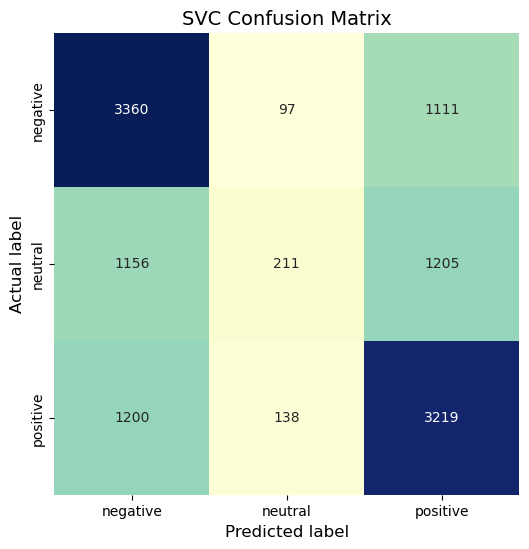

In [26]:
# confusion_matrix
svc_cm = confusion_matrix(y_test, y_pred)

labels = ['negative','neutral','positive']
plt.figure(figsize= (6,6))
sns.heatmap(pd.DataFrame(svc_cm), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('SVC Confusion Matrix', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

In [27]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.74      0.65      4568
           1       0.47      0.08      0.14      2572
           2       0.58      0.71      0.64      4557

    accuracy                           0.58     11697
   macro avg       0.55      0.51      0.48     11697
weighted avg       0.56      0.58      0.53     11697



In [28]:
# Calcula el F1-score
f1 = f1_score(y_test, y_pred, average='weighted', labels=[1])
f1

0.13982770046388338

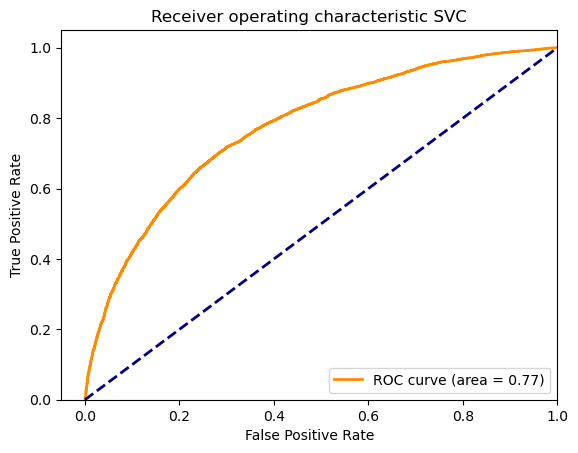

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Obtener las probabilidades de la predicción
y_score = pipe_model.decision_function(X_test)

# Crear un diccionario con los valores necesarios para graficar la curva AUC-ROC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva AUC-ROC
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic SVC')
plt.legend(loc="lower right")
plt.show()

En este caso, la clase 0 tuvo una precisión del 59% y una recall del 74%, lo que significa que el modelo fue capaz de identificar correctamente el 59% de los elementos clasificados como positivos y el 74% de los elementos reales que eran positivos. La clase 1 tuvo una precisión del 47% y una recall del 8%, lo que sugiere que el modelo tuvo dificultades para identificar esta clase en particular. La clase 2 tuvo una precisión del 58% y una recall del 71%.

La exactitud general del modelo fue del 58%, lo que indica que fue capaz de clasificar correctamente el 58% de los elementos del conjunto de datos. La media ponderada de la precisión, la recall y la f1-score fue del 56%, lo que indica un desempeño promedio del modelo.

El valor de la curva ROC (0.77) sugiere que el modelo tiene una capacidad razonablemente buena para distinguir entre las diferentes clases.

## 4.  Hiperparametos (Mejores parametros)

In [37]:
pipeline = Pipeline(
    [
        ('vector', CountVectorizer(lowercase=False)), 
        ('tfidf', TfidfTransformer()),  
        ('model', SGDClassifier(random_state=42))
    ]
)

parameters = {
    'model__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__max_iter': [1000, 2000, 5000],
    'model__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print('score', grid_search.score(X_test, y_test))
print('-----')

print('GridSearchCV:')
y_pred_p = grid_search.predict(X_test)

print("Best score: %0.4f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

# Print Confusion Matrix
labels = np.unique(y_test)
cm =  confusion_matrix(y_test, y_pred_p, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
score 0.5835684363512011
-----
GridSearchCV:
Best score: 0.5914
Best parameters set:
	model__alpha: 0.0001
	model__class_weight: 'balanced'
	model__max_iter: 1000
	model__penalty: 'elasticnet'


,0,1,2
0,3160,445,963
1,956,663,953
2,1060,494,3003


In [38]:
# model with best parameters

pipeline_bp = Pipeline(
    [
        ('vector', CountVectorizer(lowercase=False)), 
        ('tfidf', TfidfTransformer()),  
        ('model', SGDClassifier(random_state=42, alpha= 0.0001, class_weight='balanced', max_iter=1000, 
                                penalty='elasticnet'))
    ]
)

pipeline_bp.fit(X_train, y_train)
print('Accuracy score: {0:.4f}'.format(pipeline_bp.score(X_test, y_test)))

y_pred_bp = pipeline_bp.predict(X_test)

Accuracy score: 0.5836


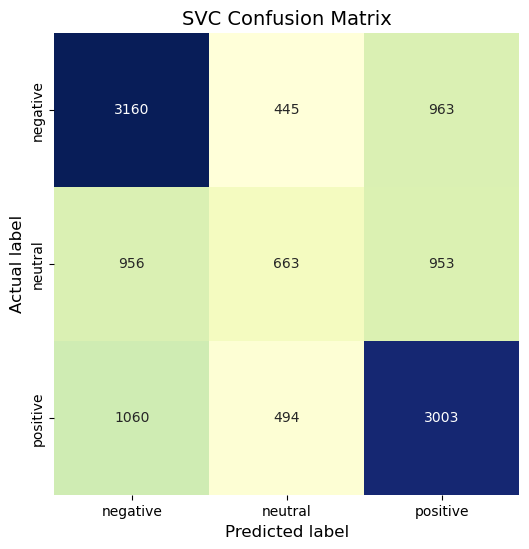

In [39]:
# confusion_matrix
svc_cm_bp = confusion_matrix(y_test, y_pred_bp)

labels = ['negative','neutral','positive']
plt.figure(figsize= (6,6))
sns.heatmap(pd.DataFrame(svc_cm_bp), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('SVC Confusion Matrix', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

In [40]:
# classification_report
print(classification_report(y_test, y_pred_bp))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65      4568
           1       0.41      0.26      0.32      2572
           2       0.61      0.66      0.63      4557

    accuracy                           0.58     11697
   macro avg       0.54      0.54      0.53     11697
weighted avg       0.57      0.58      0.57     11697



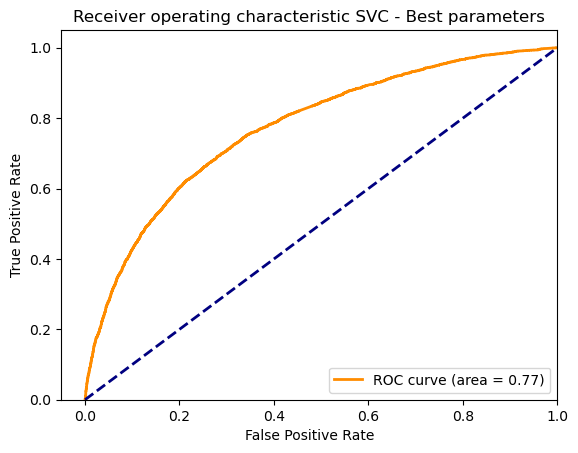

In [41]:
# Obtener las probabilidades de la predicción
y_score = pipeline_bp.decision_function(X_test)

# Crear un diccionario con los valores necesarios para graficar la curva AUC-ROC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva AUC-ROC
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic SVC - Best parameters')
plt.legend(loc="lower right")
plt.show()

In [43]:
# model with best parameters with CV

# Crear el pipeline con los pasos de preprocesamiento y el modelo
pipeline_cv = Pipeline([
    ('vector', CountVectorizer(lowercase=False)), 
    ('tfidf', TfidfTransformer()),  
    ('model', SGDClassifier(random_state=42, alpha= 0.0001, class_weight='balanced', max_iter=1000, 
                                penalty='elasticnet'))
])

# Calcular la puntuación de precisión usando cross-validation con 5 folds
score = cross_val_score(pipeline_cv, X, y, cv=5, scoring='accuracy')

# Imprimir la puntuación media de precisión
print('Accuracy score: {0:.4f}'.format(score.mean()))

Accuracy score: 0.5796


## 5.  Balanceo de la data (Smote SKleaern)

In [44]:
pipeline_sm = ImbPipeline(
    [
        ('vector', CountVectorizer(lowercase=False)), 
        ('tfidf', TfidfTransformer()),
        ('smote', ImbPipeline([
            ('smote', SMOTE(random_state=42)),
            ('model', SGDClassifier(random_state=42, alpha= 0.0001, class_weight='balanced', max_iter=1000, 
                                   penalty='elasticnet'))
        ]))
    ]
)

score = cross_val_score(pipeline_sm, X, y, cv=5, scoring='accuracy')
print('Accuracy score: {0:.4f}'.format(score.mean()))

Accuracy score: 0.5589


In [47]:
pipeline_sm.fit(X_train, y_train)
print('Accuracy score: {0:.4f}'.format(pipeline_sm.score(X_test, y_test)))

y_pred_sm = pipeline_sm.predict(X_test)

Accuracy score: 0.5665


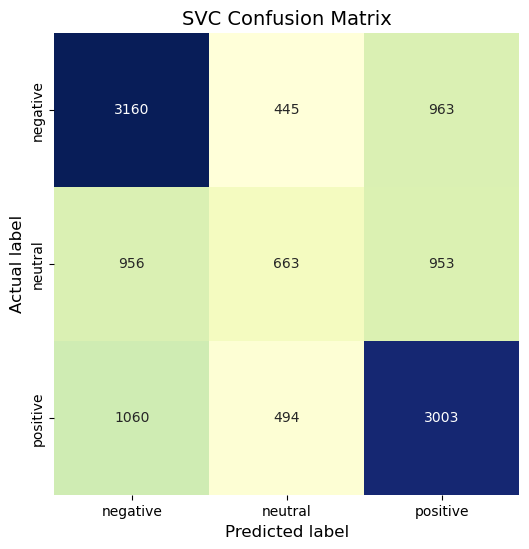

In [48]:
# confusion_matrix
svc_cm_sm = confusion_matrix(y_test, y_pred_sm)

labels = ['negative','neutral','positive']
plt.figure(figsize= (6,6))
sns.heatmap(pd.DataFrame(svc_cm_bp), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('SVC Confusion Matrix', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

## 6. Observaciones generales

* Se evaluaron cinco modelos diferentes para el análisis de sentimiento de tweets y se encontró que el modelo SGDClassifier fue la mejor opción, ya que logró una precisión media competitiva con tiempos de entrenamiento y predicción más bajos que los otros modelos evaluados.


* Se utilizó GridSearchCV para encontrar los mejores hiperparámetros para el modelo, y se encontró que los mejores parámetros fueron un valor de alfa de 0.0001, un peso de clase balanceado, un máximo de iteraciones de 1000 y una penalización de elasticnet.


* Se creó una pipeline con los mejores parámetros y se utilizó la validación cruzada para evaluar la precisión media del modelo, que fue de 0.5914. Sin embargo, se intentó mejorar la precisión utilizando SMOTE de SKLearn para balancear los datos, pero se encontró que la precisión disminuyó a 0.5665.


* En conclusión, se podría decir que aunque se encontró un modelo con una precisión media razonable, aún se necesitan mejoras significativas en el modelo para aumentar su precisión y rendimiento en la clasificación de emociones en tweets. 